# Trapezoidal rule integration
_CYBR 304_ <br>
_Spring 2024_ <br>

The function `Trapezoidal` returns the n-panel trapezoidal rule estimation for  `integrate(f(x),x,a,b)`

In [27]:
"""
    trapezoidial(f::Function, a::Number, b::Number, n::Integer)

Return the n-panel trapezoidal rule estimation for `integrate(f(x),x,a,b)`
"""
function trapezoidal(f::Function, a::Number, b::Number, n::Integer)
    h = (b-a)/n
    s = (f(a) + f(b))/2
    for k = 1 : n-1
        s += f(a + h*k)
    end
    h*s
end

trapezoidal

Let's make sure that the documentation string works correctly

In [28]:
? trapezoidal

search: trapezoidal trapezoidal_adaptive



```
trapezoidial(f::Function, a::Number, b::Number, n::Integer)
```

Return the n-panel trapezoidal rule estimation for `integrate(f(x),x,a,b)`


In [29]:
trapezoidal(x -> 1, 0,1,1)

1.0

In [30]:
trapezoidal(x -> 1, 0,1,10)

1.0

In [31]:
trapezoidal(x -> x, 0,1,1)

0.5

In [32]:
trapezoidal(x -> 1, 0,1,10)

1.0

In [34]:
trapezoidal(x -> 1, 0,1, -9)

-0.1111111111111111

In [35]:
trapezoidal(x -> 1, 0,1, 0)

Inf

In [36]:
import Base.//

In [37]:
//(x::T, y::Integer) where {T<:AbstractFloat} = x / y

// (generic function with 9 methods)

In [38]:
"""
    trapezoidial(f::Function, a::Number, b::Number, n::Integer)

Return the n-panel trapezoidal rule estimation for `integrate(f(x),x,a,b)`
"""
function trapezoidal(f::Function, a::Number, b::Number, n::Integer)
    n > 0 || throw(ArgumentError("The number of panels must be positive, found $n"))
    h = (b-a)//n
    s = (f(a) + f(b))//2
    for k = 1 : n-1
        s += f(fma(h,k,a))
    end
    h*s
end

trapezoidal

In [39]:
trapezoidal(x -> x, 0, 1, -10)

LoadError: ArgumentError: The number of panels must be positive, found -10

In [40]:
trapezoidal(x -> BigInt(1)//x, BigInt(1)//1, BigInt(2)//1, 10)

161504821//232792560

In [41]:
function trapezoidal_r(f::Function, a::Number, b::Number, n::Integer)
  if n==1
        (b-a)*(f(a)+f(b))//2
  else
        mid = (a+b)//2
        n = div(n,2) + if isodd(n) 1 else 0 end
        trapezoidal_r(f,a,mid,n) + trapezoidal_r(f,mid,b,n) 
  end
end

trapezoidal_r (generic function with 1 method)

In [42]:
(f, a, b, n) = (x -> x*sin(x^2), 0.0, 5.0, 2^28);

In [43]:
Tr = trapezoidal_r(f,a,b,n)

0.004398594068264816

In [44]:
Ts = trapezoidal(f,a,b,n)

0.004398594067772528

In [45]:
Texact = 1/2-cos(25)/2

0.004398594068263206

In [46]:
Tr - Texact

1.609823385706477e-15

In [47]:
Ts - Texact

-4.906786782443717e-13

In [48]:
abs(Tr - Texact) < abs(Ts - Texact)

true

In [52]:
"""
    Trapezoidial_adaptive(f::Function, a::Number, b::Number, maxError::Number,maxLength::Number)

Use and adaptive trapezoidal rule for `integrate(f(x),x,a,b)`. The method attempts to return a value
whose error is less than `maxError`. The largest step size is `maxLength`
"""
function trapezoidal_adaptive(f::Function, a::Number, b::Number, max_error::Number, max_length::Number)
    n = convert(Int, ceil((b-a)/max_length))
    i1 = trapezoidal(f,a,b,n)
    i2 = trapezoidal(f,a,b,2*n)
    e =  abs(4*(i2 - i1)/3)
    if e < max_error
        (4*i2 - i1)/3
    else
        mid = (a+b)//2
        trapezoidal_adaptive(f,a,mid, max_error/2, max_length) + trapezoidal_adaptive(f,mid, b,max_error/2, max_length) 
    end 
end

trapezoidal_adaptive

Our code is inefficient--there is redundancy in computing both `trapezoidal(f,a,b,n)` and `trapezoidal(f,a,b,2n)`. Maybe you all can fix that.

In [55]:
 Ta = trapezoidal_adaptive(x -> x*sin(x^2),0,5, 1.0e-10, 0.1)

0.004398594068263373

In [56]:
Texact - Ta

-1.6653345369377348e-16

Here is a function that can be problematic for numerical integration. It is vary nearly zero everywhere except at a big spike near an endpoint. 

In [61]:
f = x -> 1000001 * x^(1000000)

#43 (generic function with 1 method)

Its graph is misleading

In [62]:
using Gadfly

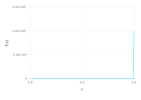

In [63]:
plot(f,0,1)

In [72]:
trapezoidal(f,0.0,1.0,10^8)

1.000008333349217

In [73]:
 trapezoidal_adaptive(f,0.0,1.0,1.0e-8,1)

1.0000000000000004

Can we do better than the best? If not, we are losers:

In [74]:
using QuadGK

In [75]:
quadgk(f, 0, 1, rtol=1.0e-8)

(0.0, 0.0)